Project Title :  **Flight Delay** **Prediction** 















**Aim** :

 The aim of the project is to predict if the flight is Delayed or not

**Team Members:**

Pragadeeshwar N E0119003


Aswin G E0119062




Lohit Arun S E0119042

## Importing libraries

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import auc

import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the dataset

In [ ]:
flights = pd.read_csv('/content/drive/MyDrive/flights.csv')
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [ ]:
flights_needed_data = flights[0:100000]
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,1102.0,-6.0,23.0,1125.0,71.0,66.0,40.0,238,1205.0,3.0,1219,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,1117.0,9.0,11.0,1128.0,274.0,267.0,248.0,2176,1836.0,8.0,1842,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,1101.0,-7.0,28.0,1129.0,77.0,91.0,59.0,238,1228.0,4.0,1225,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,1116.0,7.0,26.0,1142.0,165.0,157.0,123.0,1005,1445.0,8.0,1454,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights_needed_data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

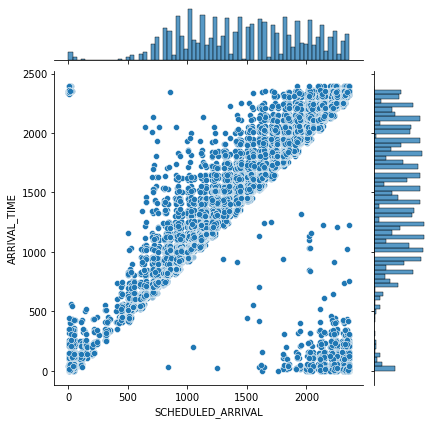

In [ ]:
sns.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [ ]:
corr = flights_needed_data.corr(method='pearson')

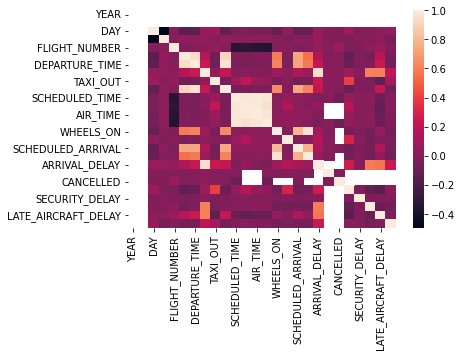

In [ ]:
sns.heatmap(corr)

In [ ]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.004412,-0.138130,-0.124369,0.060064,0.093451,-0.119781,-0.026285,-0.018470,-0.036330,-0.035208,-0.095731,0.037407,-0.110820,-0.091687,0.070770,0.004847,-0.006000,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,0.010955,0.046914,0.045182,0.055632,0.007291,0.044150,0.019755,0.029025,0.030678,0.024666,0.013749,-0.017789,0.031725,0.011477,0.067520,-0.000709,-0.006409,-0.019626,0.008156,0.003648,0.033729,-0.050835
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,1.000000,-0.003027,0.010140,0.034863,0.061010,0.016377,-0.337801,-0.318819,-0.339135,-0.356196,-0.003670,0.014464,-0.018891,0.000753,0.056163,0.007155,0.090008,-0.032564,-0.007260,0.023770,0.076581,0.004246
SCHEDULED_DEPARTURE,NaN,NaN,-0.138130,0.046914,-0.003027,1.000000,0.943186,0.174254,-0.081496,0.912232,-0.019873,-0.025744,-0.011993,0.000321,0.585786,-0.027502,0.731240,0.552653,0.154951,0.002515,-0.002631,-0.112393,-0.017957,-0.054419,0.186286,-0.042004
DEPARTURE_TIME,NaN,NaN,-0.124369,0.045182,0.010140,0.943186,1.000000,0.243960,-0.070081,0.966477,-0.031873,-0.035204,-0.024384,-0.016562,0.618850,-0.017759,0.734970,0.584615,0.223654,0.006576,0.009679,-0.093096,-0.012820,-0.013304,0.247325,-0.046406
DEPARTURE_DELAY,NaN,NaN,0.060064,0.055632,0.034863,0.174254,0.243960,1.000000,0.061905,0.231399,0.005868,0.015257,0.002733,0.004591,0.090696,0.040285,0.155150,0.079639,0.950838,0.020787,0.030862,0.085794,0.008040,0.606954,0.605289,0.210402
TAXI_OUT,NaN,NaN,0.093451,0.007291,0.061010,-0.081496,-0.070081,0.061905,1.000000,-0.043114,0.096191,0.215749,0.077234,0.057871,-0.045096,0.009041,-0.062325,-0.045611,0.245363,0.009810,0.010763,0.407371,-0.008021,-0.024674,-0.129879,0.119412
WHEELS_OFF,NaN,NaN,-0.119781,0.044150,0.016377,0.912232,0.966477,0.231399,-0.043114,1.000000,-0.038173,-0.038217,-0.031646,-0.027282,0.642358,-0.015089,0.744697,0.608611,0.217344,0.006524,0.001293,-0.085582,-0.013912,-0.017376,0.223010,-0.055273


In [ ]:
# filtering out unnecessary columns
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN
99996,1,7,LAS,PHL,1108,9.0,1842,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
99997,1,7,SFO,BFL,1108,-7.0,1225,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN
99998,1,7,ORD,MCO,1109,7.0,1454,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replacing all NaN values with the mean of the attribute in which they are present
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())
flights_needed_data


,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219,1208.0,-11.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
99996,1,7,LAS,PHL,1108,9.0,1842,1844.0,2.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
99997,1,7,SFO,BFL,1108,-7.0,1225,1232.0,7.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
99998,1,7,ORD,MCO,1109,7.0,1454,1453.0,-1.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971


In [ ]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [ ]:
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [ ]:
flights_needed_data['result'] = result

In [ ]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219,1208.0,-11.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,LAS,PHL,1108,9.0,1842,1844.0,2.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,SFO,BFL,1108,-7.0,1225,1232.0,7.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,ORD,MCO,1109,7.0,1454,1453.0,-1.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
flights_needed_data.value_counts('result')

result
0    63779
1    36221
dtype: int64

In [ ]:
# removing some more columns
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data


,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,10,-8.0,750,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,20,-2.0,806,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,20,-5.0,805,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,25,-1.0,320,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,1108,-6.0,1219,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,1108,9.0,1842,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,1108,-7.0,1225,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,1109,7.0,1454,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


## Splitting the dataset into Train and Test data

In [ ]:
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)  # splitting in the ratio 80:20

In [ ]:
# define a function to train and test the models
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def test_model(model,X_test,y_test):
  predictions = model.predict(X_test)
  accuracy = model.score(X_test, y_test)
  metrics_report = classification_report(y_test, predictions)
  precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
  return predictions, accuracy, metrics_report, (precision, recall, fscore)

## Feature Scaling : Standardisation

In [ ]:
scaled_features = StandardScaler()
X_train = scaled_features.fit_transform(X_train)
X_test = scaled_features.transform(X_test)


## **CO1 :  Base Learners**

***Decision Tree :***

In [ ]:
# define the model
dt_model = DecisionTreeClassifier(random_state=42)

# fit the model
dt_model = train_model(dt_model, X_train, y_train)
print(dt_model)

DecisionTreeClassifier(random_state=42)


***Logistic Regression:***

In [ ]:
# define the model
log_model = LogisticRegression(penalty='l2', max_iter=500) 

# fit the model
log_model= train_model(log_model, X_train,y_train)
print(log_model)

LogisticRegression(max_iter=500)


***Support Vector Machine:***

In [ ]:
svm_model= SVC(kernel = 'linear', random_state = 0)
svm_model = train_model(svm_model,X_train,y_train)
print(svm_model)

SVC(kernel='linear', random_state=0)


## ***CO2 :Ensemble Learning :***

***Hard Voting***

In [ ]:
estimators = [('Decision Tree',dt_model),('Logistic Regression',log_model),('Support Vector Machine',svm_model)]

ensemble_model = VotingClassifier(estimators=estimators,voting='hard')
ensemble_model = train_model(ensemble_model,X_train,y_train)


***Gradient Boosting***

In [ ]:
# define the model
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=10, random_state=2)

# fit the model
gb_model = train_model(gb_model, X_train,y_train)
print(gb_model)

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=2)


## **CO3 : Dimensionality Reduction**

### ***Principal Component Analysis***

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X1_train = pca.fit_transform(X_train)
X1_test = pca.transform(X_test)

In [ ]:
# define the model
log_model_pca = LogisticRegression(penalty='l2', max_iter=500)

# fit the model
log_model_pca= train_model(log_model_pca, X1_train,y_train)
print(log_model_pca)

LogisticRegression(max_iter=500)


## **CO4 : Artificial Neural Network**




In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy' ,metrics = ['accuracy'])

In [ ]:
ann.fit(X1_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 7s 2ms/step - loss: 0.1579 - accuracy: 0.9459
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0515 - accuracy: 0.9811
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0414 - accuracy: 0.9840
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0341 - accuracy: 0.9860
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0280 - accuracy: 0.9885
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0237 - accuracy: 0.9909
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0214 - accuracy: 0.9918
Epoch 8/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0198 - accuracy: 0.9925
Epoch 9/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0185 - accuracy: 0.9924
Epoch 10/100
2500/2500 [==============================] - 5s 2ms/step - l

## **CO5:  Comparison of Models**



***Decision Tree Prediction:***

accuracy: 0.9981
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12704
         1.0       1.00      1.00      1.00      7296

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



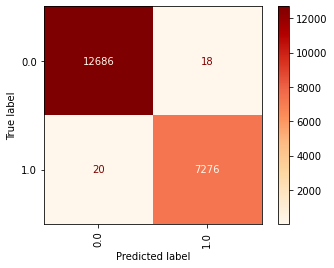

In [ ]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_pred,y_test)
metrics_report = classification_report(y_test, y_pred)
precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
dt_prf =(precision, recall, fscore)
print('accuracy: {}'.format(dt_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(dt_model,X_test,y_test,xticks_rotation='vertical', cmap="OrRd")

***Support Vector Machine Prediction***:

accuracy: 0.98605
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     12704
         1.0       0.97      0.99      0.98      7296

    accuracy                           0.99     20000
   macro avg       0.98      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



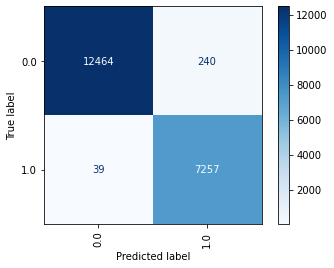

In [ ]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_pred,y_test)
metrics_report = classification_report(y_test, y_pred)
precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
svm_prf =(precision, recall, fscore)
print('accuracy: {}'.format(svm_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(svm_model,X_test,y_test,xticks_rotation='vertical', cmap="Blues")

***Logistic Regression Prediction***

accuracy: 0.9848
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     12704
         1.0       0.97      0.99      0.98      7296

    accuracy                           0.98     20000
   macro avg       0.98      0.99      0.98     20000
weighted avg       0.99      0.98      0.98     20000



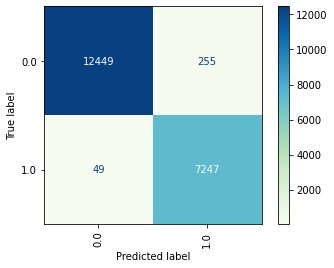

In [ ]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_pred,y_test)
metrics_report = classification_report(y_test, y_pred)
precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
log_prf =(precision, recall, fscore)
print('accuracy: {}'.format(log_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(log_model,X_test,y_test,xticks_rotation='vertical', cmap="GnBu")

***Logistic Regression after using PCA***

accuracy: 0.91315
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     12704
         1.0       0.97      0.79      0.87      7296

    accuracy                           0.91     20000
   macro avg       0.93      0.89      0.90     20000
weighted avg       0.92      0.91      0.91     20000



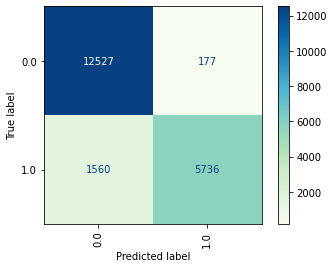

In [ ]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = log_model_pca.predict(X1_test)
log_pca_accuracy = accuracy_score(y_pred,y_test)
metrics_report = classification_report(y_test, y_pred)
precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
log_pca_prf =(precision, recall, fscore)
print('accuracy: {}'.format(log_pca_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(log_model_pca,X1_test,y_test,xticks_rotation='vertical', cmap="GnBu")

 ***ANN Prediction***

accuracy: 0.9969
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12704
         1.0       0.99      1.00      1.00      7296

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



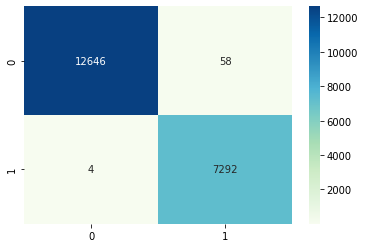

In [ ]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = ann.predict(X1_test)
y_pred = (y_pred > 0.5)
ann_accuracy = accuracy_score(y_pred,y_test)
metrics_report = classification_report(y_test, y_pred)
precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
ann_prf =(precision, recall, fscore)
print('accuracy: {}'.format(ann_accuracy))
print('='*100)
print(metrics_report)
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")

***Hard Voting Classifier***

accuracy: 0.986
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     12704
         1.0       0.97      0.99      0.98      7296

    accuracy                           0.99     20000
   macro avg       0.98      0.99      0.98     20000
weighted avg       0.99      0.99      0.99     20000



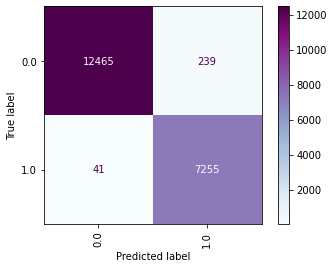

In [ ]:
predictions, hard_accuracy, metrics_report, hard_prf = test_model(ensemble_model, X_test, y_test)

print('accuracy: {}'.format(hard_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(ensemble_model, X_test,y_test, xticks_rotation='vertical', cmap="BuPu")

***Gradient Boosting Classifier:***

accuracy: 0.99855
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12704
         1.0       1.00      1.00      1.00      7296

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



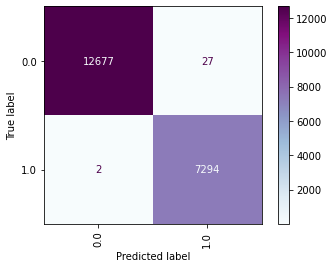

In [ ]:

predictions, gb_accuracy, metrics_report, gb_prf = test_model(gb_model, X_test, y_test)

print('accuracy: {}'.format(gb_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(gb_model, X_test, y_test, xticks_rotation='vertical', cmap="BuPu")



## **CO5 : Model Evaluation**

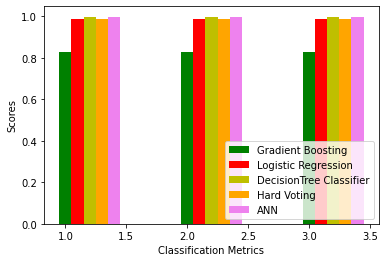

In [ ]:
# classification matric indices
xx = np.array([1,2,3])
width = 0.1
gb_prf = np.array([0.83, 0.83, 0.83])
ax = plt.subplot(111)
ax.bar(xx ,height=np.array(gb_prf), width=width, color='g', align='center', label='Gradient Boosting')
ax.bar(xx + 1*width, height=np.array(log_prf), width=width, color='r', align='center', label='Logistic Regression')
ax.bar(xx + 2*width, height=np.array(dt_prf), width=width, color='y', align='center', label='DecisionTree Classifier')
ax.bar(xx + 3*width, height=np.array(hard_prf), width=width, color='orange', align='center', label='Hard Voting')
ax.bar(xx + 4*width, height=np.array(ann_prf), width=width, color='violet', align='center', label='ANN')


plt.xlabel('Classification Metrics')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cl_metric = pd.DataFrame(data = {"Models":[],"Precision":[],"recall":[],"f1-score":[],"accuracy_score":[]})
prfs=[("Logistic Regression",log_prf),("Logistic Regression (PCA)",log_pca_prf),("Support Vector Machine",svm_prf),("Decision Tree",dt_prf),("ANN",ann_prf),("Hard Voting",hard_prf),("Gradient Boosting",gb_prf)]
names=[]
pre=[]
rec=[]
f1=[]
ac=[log_accuracy,log_pca_accuracy,svm_accuracy,dt_accuracy,ann_accuracy,hard_accuracy,gb_accuracy]
for name,(p,r,f) in prfs:
  names.append(name)
  pre.append(p)
  rec.append(r)
  f1.append(f)
cl_metric["Models"]=names
cl_metric["Precision"]=pre
cl_metric["recall"]=rec
cl_metric["f1-score"]=f1
cl_metric["accuracy_score"]=ac

In [ ]:
print(cl_metric.to_string(index=False))

                    Models  Precision   recall  f1-score  accuracy_score
       Logistic Regression   0.985110  0.98480  0.984844         0.98480
 Logistic Regression (PCA)   0.918738  0.91315  0.910845         0.91315
    Support Vector Machine   0.986340  0.98605  0.986089         0.98605
             Decision Tree   0.998100  0.99810  0.998100         0.99810
                       ANN   0.996920  0.99690  0.996902         0.99690
               Hard Voting   0.986283  0.98600  0.986039         0.98600
         Gradient Boosting   0.830000  0.83000  0.830000         0.99855


**Inference:**
Since we are convinced with the accuracy received from the Boosting model (Gradient) it was not necessary to use the Bagging and Stacking techniques for the prediction

So, from the above predictions it clearly indicates that the Gradient Boosting Model is much reliable in comparison with other models


